In [1]:
import pandas as pd
import numpy as np
import os, fnmatch, re, cv2, random,sys, pickle
import torch
#import imgaug as ia
#import imageio
%matplotlib inline  
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from torch.utils import data
from torchvision import transforms
import torch.nn as nn
sys.path.append('..')

#root_locEm = "../"
root_datasets = "/mnt/data1/datasets/"
#root_ImageNetVidsDevkit = root_datasets+"ImageNetVids/imageNetVidsDevkit.data/"
#root_ImageNetVids = root_datasets+"ImageNetVids/imageNetVids.data/"

path_to_frames= root_datasets+"ILSVRC2015/Data/VID/train/"
path_to_val_frames= root_datasets+"ILSVRC2015/Data/VID/val/"
#path_to_annotations= root_ImageNetVids+"Annotations/VID/train/"

from genINV_Yolo_v2 import ImageNetVID
from torch.utils.data import DataLoader

image_size = 448
map_vid = pd.read_pickle("../data/map_vid.pkl")

In [2]:
!ls /mnt/data1/shravank

datasets  results


In [3]:
def collate_fn(data):

    '''print("TYPE DATA COLLATE",type(data))
    print("LEN DATA COLLATE",len(data))
    print("type data[0]",type(data[0][0]))
    print("type data[1]",type(data[0][1]))
    print("type data[2]",type(data[0][2]))'''

    #sys.exit(0)
    '''images = torch.tensor(np.transpose(data[0][0],(2,0,1)))
    bboxes = torch.tensor(data[0][1])'''

    n = len(data[0])
    out = []

    for i in range(n):
        out.append(data[0][i])

    return out

In [4]:
train_dataset = "../data/metadata_imgnet_vid_train_n2.pkl"
val_dataset = "../data/metadata_imgnet_vid_val_n2.pkl"
root_datasets = "/mnt/data1/shravank/datasets/"
gen_train = ImageNetVID(root_datasets,train_dataset,split='train',image_size=image_size,S=7,B=2,C=30,X=5)
gen_val = ImageNetVID(root_datasets,val_dataset,split='val',image_size=image_size,S=7,B=2,C=30,X=5)
train_loader = DataLoader(gen_train,batch_size=2,shuffle=True,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=2,collate_fn=collate_fn)

USING v101 of generator
Invoking augmentor
USING v101 of generator
Invoking augmentor
train Length of the dataset to traverse 15806
train Length of the dataset to traverse 15806


In [68]:
img,tgt=[],[]
for i,(img,tgt,en_t) in enumerate(train_loader):
    break

train Length of the dataset to traverse 15806


In [69]:
tgt.size()

torch.Size([1, 4])

In [70]:
def showTorchTensorImg(img):
    
    #assert img is a torch of size nchw
    return plt.imshow(img.permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


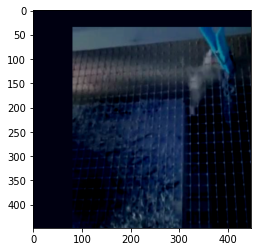

In [71]:
img = img.permute(1,2,0).numpy()
plt.imshow(img)
#showTorchTensorImg(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4])
274 62 390 177
<class 'numpy.ndarray'>


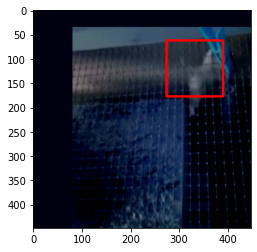

In [72]:
for b in tgt:
    print(b.view(-1).size())
    x1,y1,x2,y2 = b.view(-1).numpy()
    x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
    print(x1,y1,x2,y2)
    print(type(img))
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),3)
    #cv2.rectangle(img,(200,300),(300,200),(255,0,0),3)
plt.imshow(img)

In [ ]:
i1 = cv2.imread(path_to_frames+'ILSVRC2015_VID_train_0002/ILSVRC2015_train_00179003'+'/'+'000134'+'.JPEG')
plt.imshow(i1)

In [ ]:
#Testing number of boxes in image and boxes loaded in target

In [51]:
img,im_box,trgt=[],[],[]
for i,(img,im_box,trgt) in enumerate(train_loader):
    break

train Length of the dataset to traverse 15806


In [52]:
trgt.size()

torch.Size([7, 7, 40])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


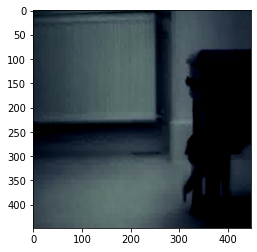

In [53]:
showTorchTensorImg(img)

In [40]:
tgt_bx_msk = (trgt[:,:,4]==1) | (trgt[:,:,9]==1)

In [41]:
tgt_bx_msk

tensor([[False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False]])

In [42]:
np.count_nonzero(tgt_bx_msk.numpy())

1

In [43]:
im_box.size()

torch.Size([1, 4])

In [54]:
error,total =0,0
for i,(img,im_box,trgt) in enumerate(val_loader):
    tgt_bx_msk = (trgt[:,:,4]==1) | (trgt[:,:,9]==1)
    boxes_in_images = im_box.size()[0]
    boxes_in_target = np.count_nonzero(tgt_bx_msk.numpy())
    total+=1
    if not boxes_in_images == boxes_in_target :
        error+=1
        #print('i')

val Length of the dataset to traverse 2618


In [44]:
(error*100.0)/total

17.398456282424394

In [55]:
(error*100.0)/total

23.605805958747137

In [ ]:
def showTorchTensorImg(img):
    
    #assert img is a torch of size nchw
    return plt.imshow(img.permute(1,2,0).numpy())

In [ ]:
from genINV_Yolo_Emb_v2 import ImageNetVID_RTR
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
train_dataset = "../data/metadata_imgnet_vid_train_n2.pkl"
#best val dataset has _new
val_dataset = "../data/metadata_imgnet_vid_val_n2.pkl"
root_datasets = '/mnt/data1/shravank/datasets/'

In [ ]:
image_size = 448
batch_size = 10

In [ ]:
def collate_fn(data):

    '''print("TYPE DATA COLLATE",type(data))
    print("LEN DATA COLLATE",len(data))
    print("type data[0]",type(data[0][0]))
    print("type data[1]",type(data[0][1]))
    print("type data[2]",type(data[0][2]))'''

    #sys.exit(0)

    n = len(data[0])
    out = []

    for i in range(n):
        out.append(data[0][i])

    return out

In [ ]:
gen_train = ImageNetVID_RTR(root_datasets,train_dataset,split='train',image_size=image_size)
gen_val = ImageNetVID_RTR(root_datasets,val_dataset,split='val',image_size=image_size)

train_loader = DataLoader(gen_train,batch_size=batch_size,shuffle=False,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=batch_size,shuffle=True)

In [ ]:
m,c,n = [],[],[]
for i, (sample_img,sample_class,ids) in enumerate(val_loader):
    m,c,n =sample_img,sample_class,ids
    print(type(sample_img))
    print(type(sample_class))
    print(type(ids))
    break

In [ ]:
c

In [ ]:
n

In [ ]:
showTorchTensorImg(m.squeeze(0))

In [ ]:
qe = []

In [ ]:
qe.append(n.numpy())

In [ ]:
len(qe)

In [ ]:
import numpy as np
q = np.concatenate(qe,axis=0)

In [ ]:
q.shape

In [ ]:
import pandas as pd
pd.read_pickle("../data/map_vid.pkl")